In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("data/clinicaltrial_data.csv")

#view the Mouse and Drug Data
mouse_drug_data_to_load.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
#view Clinical Trial data
clinical_trial_data_to_load.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
merged_data=pd.merge(clinical_trial_data_to_load, mouse_drug_data_to_load, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
tumor_mean=merged_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
#calculating mean for selected drugs (Capomulin, Infubinol, Ketapril, and Placebo)
tumor_mean_index=tumor_mean.set_index('Drug')

capo_mean=tumor_mean_index.loc["Capomulin", :]['Tumor Volume (mm3)']
infu_mean=tumor_mean_index.loc["Infubinol", :]['Tumor Volume (mm3)']
ketapril_mean=tumor_mean_index.loc["Ketapril", :]['Tumor Volume (mm3)']
placebo_mean=tumor_mean_index.loc["Placebo", :]['Tumor Volume (mm3)']

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
stan_error=merged_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Preview DataFrame
stan_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [49]:
#calculating standard error for selected drugs (Capomulin, Infubinol, Ketapril, and Placebo)
stan_error_index=stan_error.set_index('Drug')

capo_error=stan_error_index.loc["Capomulin", :]['Tumor Volume (mm3)']
infu_error=stan_error_index.loc["Infubinol", :]['Tumor Volume (mm3)']
ketapril_error=stan_error_index.loc["Ketapril", :]['Tumor Volume (mm3)']
placebo_error=stan_error_index.loc["Placebo", :]['Tumor Volume (mm3)']

In [8]:
# Minor Data Munging to Re-Format the Data Frames
tumor_pivot=tumor_mean.pivot("Timepoint", "Drug","Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


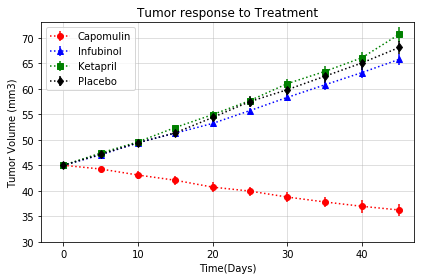

In [101]:
# Generate the Plot (with Error Bars)
timepoints = np.arange(0, 50, 5)

capo_plot=plt.errorbar(timepoints, capo_mean, capo_error, fmt="o", ls=":", color="red", label="Capomulin")

infu_plot=plt.errorbar(timepoints, infu_mean, infu_error, fmt="^", ls=":", color="blue", label="Infubinol")

ketapril_plot=plt.errorbar(timepoints, ketapril_mean, ketapril_error, fmt="s", ls=":", color="green", label="Ketapril")

placebo_plot=plt.errorbar(timepoints, placebo_mean, placebo_error, fmt="d", ls=":", color="black", label="Placebo")

#labeling
plt.title("Tumor response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-3, 47, 10)
plt.ylim(30, 73, 5)
plt.grid(linestyle="solid")
plt.grid(alpha = 0.5)
plt.legend(loc="best")
plt.tight_layout()

# Save the Figure and Show Figure
plt.savefig('tumor_response.png')
plt.show()

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [40]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
meta_mean=merged_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

# Preview DataFrame
meta_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [51]:
#calculating average meta response for selected drugs (Capomulin, Infubinol, Ketapril, and Placebo)
meta_mean_index=meta_mean.set_index('Drug')

capo_meta_mean=meta_mean_index.loc["Capomulin", :]["Metastatic Sites"]
infu_meta_mean=meta_mean_index.loc["Infubinol", :]["Metastatic Sites"]
ketapril_meta_mean=meta_mean_index.loc["Ketapril", :]["Metastatic Sites"]
placebo_meta_mean=meta_mean_index.loc["Placebo", :]["Metastatic Sites"]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [55]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
meta_error_group=merged_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index()

# Preview DataFrame
meta_error_group.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [59]:
#calculating standard error for meta response for selected drugs (Capomulin, Infubinol, Ketapril, and Placebo)
meta_error_group_index=meta_error_group.set_index('Drug')

capo_meta_error=meta_error_group_index.loc["Capomulin", :]['Metastatic Sites']
infu_meta_error=meta_error_group_index.loc["Infubinol", :]['Metastatic Sites']
ketapril_meta_error=meta_error_group_index.loc["Ketapril", :]['Metastatic Sites']
placebo_meta_error=meta_error_group_index.loc["Placebo", :]['Metastatic Sites']

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [60]:
# Minor Data Munging to Re-Format the Data Frames
meta_pivot=meta_mean.reset_index()
meta_pivot_df=meta_pivot.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
meta_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


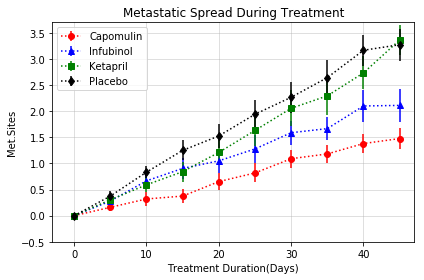

In [88]:
timepoints = np.arange(0, 50, 5)

capo_meta_plot=plt.errorbar(timepoints, capo_meta_mean, capo_meta_error, fmt="o", ls=":", color="red", label="Capomulin")

infu_meta_plot=plt.errorbar(timepoints, infu_meta_mean, infu_meta_error, fmt="^", ls=":", color="blue", label="Infubinol")

ketapril_meta_plot=plt.errorbar(timepoints, ketapril_meta_mean, ketapril_meta_error, fmt="s", ls=":", color="green", label="Ketapril")

placebo_meta_plot=plt.errorbar(timepoints, placebo_meta_mean, placebo_meta_error, fmt="d", ls=":", color="black", label="Placebo")

#labeling
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met.Sites")
plt.xlim(-3, 47, 10)
plt.ylim(-0.5, 3.7, 0.5)
plt.grid(linestyle="solid")
plt.grid(alpha = 0.5)
plt.legend(loc="best")
plt.tight_layout()

# Save the Figure and Show Figure
plt.savefig('metastatic_spread.png')
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [91]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mise_count=merged_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count().reset_index()

# Preview DataFrame
mise_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [92]:
#calculating mise count for selected drugs (Capomulin, Infubinol, Ketapril, and Placebo)
mise_count_index=mise_count.set_index('Drug')

capo_mise=mise_count_index.loc["Capomulin", :]['Mouse ID']
infu_mise=mise_count_index.loc["Infubinol", :]['Mouse ID']
ketapril_mise=mise_count_index.loc["Ketapril", :]['Mouse ID']
placebo_mise=mise_count_index.loc["Placebo", :]['Mouse ID']

#calcilating mise survival rate for selected drugs (Capomulin, Infubinol, Ketapril, and Placebo)
#devide series by 25 which is the number of mise at the beginning of the trial
capo_survive=capo_mise*100/25
infu_survive=infu_mise*100/25
ketapril_survive=ketapril_mise*100/25
placebo_survive=placebo_mise*100/25

In [87]:
# Minor Data Munging to Re-Format the Data Frames
mise_pivot=mise_count.pivot(index="Timepoint", columns="Drug")["Mouse ID"]
# Preview that Reformatting worked
# Preview the Data Frame
mise_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


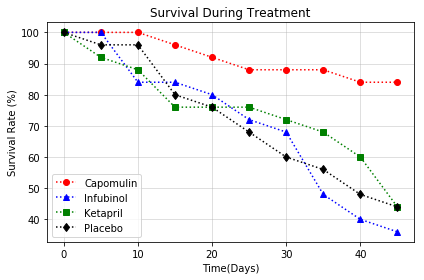

In [108]:
# Generate the Plot (Accounting for percentages)
timepoints = np.arange(0, 50, 5)

capo_mise_plot=plt.plot(timepoints, capo_survive, "o", ls=":", color="red", label="Capomulin")

infu_mise_plot=plt.plot(timepoints, infu_survive, "^", ls=":", color="blue", label="Infubinol")

ketapril_misea_plot=plt.plot(timepoints, ketapril_survive, "s", ls=":", color="green", label="Ketapril")

placebo_mise_plot=plt.plot(timepoints, placebo_survive, "d", ls=":", color="black", label="Placebo")

#labeling
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(linestyle="solid")
plt.grid(alpha = 0.5)
plt.legend(loc="best")
plt.tight_layout()

# Save the Figure and Show Figure
plt.savefig('metastatic_spread.png')
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [111]:
# Calculate the percent changes for each drug
percent_change=100*(tumor_pivot.iloc[-1]-tumor_pivot.iloc[0])/tumor_pivot.iloc[0]
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [112]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple=(percent_change["Capomulin"],
                     percent_change["Infubinol"],
                     percent_change["Ketapril"],
                     percent_change["Placebo"])



In [ ]:
x_axis = np.arange(len(percent_change_tuple))




tumor_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, linewidth=0.5)

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)